<a href="https://colab.research.google.com/github/hoangcuongnguyen2001/RAG_lessons/blob/main/RAG_with_Mistral_and_Prompt_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prompt Engineering cho RAG**

Một biện pháp hay được sử dụng để giảm hallucination của LLMs là thay đổi mẫu câu hỏi mà người dùng đặt (prompt engineering). Biện pháp này cũng có thể được sử dụng cho RAG, nhằm phục vụ cho 2 mục đích:

1. Nâng cao hiệu quả của RAG pipeline (giảm hallucination, nâng cao độ chính xác, ...).
2. Hiệu chỉnh (customize) RAG pipeline cho các mục đích khác nhau, và thay đổi câu trả lời từ chatbot theo ý muốn của người sử dụng.

Phần này sẽ là minh họa về việc RAG có thể sử dụng cùng với prompt engineering. Cùng với đó, chúng ta cũng sẽ tìm hiểu về việc một model khác có thể được sử dụng cho RAG như thế nào.


***Cài đặt các thư viện cần thiết:***



Trước tiên, việc cần làm đầu tiên là cài đặt các thư viện cần thiết cho RAG pipeline. Một số điều cần lưu ý:

- Trong ví dụ này, chúng ta sử dụng PDF file, nên các thư viện đọc được PDF file cũng cần được tải. Ở đây chúng ta sẽ dùng pymupdf.
- Các thư viện khác của LlamaIndex (`llama-index-llms-huggingface, llama-index-embeddings-huggingface`) cùng với `bitsandbytes` và `accelerate` cũng cần được tải xuống.

In [ ]:
%pip install llama-index-readers-file pymupdf
!pip install llama-index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.2 MB/s eta 0:00:00


In [ ]:
!pip install llama-index-llms-huggingface
!pip install llama-index-embeddings-huggingface

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!pip install bitsandbytes
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 7.9 MB/s eta 0:00:00


Tiếp theo đó, chúng ta sẽ công khai tokens trên HuggingFace cho notebook này, để sử dụng LLM (như các ví dụ trước).

In [ ]:
from google.colab import userdata
hf_token = userdata.get('HF_TOKEN')

Sau đó chúng ta sẽ tải bài báo 'Attention is all you need'. Đây là bài báo khoa học nổi tiếng vì đã công khai mô hình Transformers (từ Google), chính là nền tảng cho nhiều mô hình học sâu (nổi bật nhất chính là LLMs như ChatGPT).

Lưu ý là arXiv (nơi lưu trữ các bài báo khoa học) sẽ đặt ID cho các bài báo, nên để dễ nhớ chúng ta cần đổi tên file PDF theo tên bài báo.

In [ ]:
!wget "https://arxiv.org/pdf/1706.03762v7"

import os

os.rename('1706.03762v7', 'Attention_is_all_you_need.pdf')

--2024-07-24 04:57:44--  https://arxiv.org/pdf/1706.03762v7
Resolving arxiv.org (arxiv.org)... 151.101.3.42, 151.101.195.42, 151.101.131.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.3.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/pdf]
Saving to: ‘1706.03762v7.2’

1706.03762v7.2      100%[===================>]   2.11M  --.-KB/s    in 0.03s   

2024-07-24 04:57:44 (83.0 MB/s) - ‘1706.03762v7.2’ saved [2215244/2215244]



Tiếp theo đó, chúng ta sẽ cài đặt logging, để theo dõi kết quả mà Python trả về cho từng đoạn code (dễ dàng hơn cho debug).

Chúng ta cũng cần tải lên vector database từ LlamaIndex, để phục vụ cho việc truy vấn kết quả từ RAG. Tài liệu sẽ bắt đầu được đọc và lưu ở bước này.

In [ ]:

import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))


from llama_index.core import VectorStoreIndex
from llama_index.core import PromptTemplate
from IPython.display import Markdown, display

In [ ]:
from pathlib import Path
from llama_index.readers.file import PyMuPDFReader

In [ ]:

loader = PyMuPDFReader()
documents = loader.load(file_path="/content/Attention_is_all_you_need.pdf")

***Sử dụng LLMs cho RAG:***

Bước tiếp theo là load LLMs từ HuggingFace cho RAG pipeline. Trong ví dụ này chúng ta sẽ sử dụng Mistral-7B-Instruct.

Có 2 điều chúng ta cần lưu ý:

1. Chúng ta vẫn phải xin quyền truy cập và sử dụng LLM (trên HuggingFace), tương tự ví dụ trước với Llama 3.
2. Prompt template của Mistral cần phải được load vào; chúng ta có thể đọc thêm trên trang này của AWS: [How to Prompt Mistral AI models, and Why
](https://community.aws/content/2dFNOnLVQRhyrOrMsloofnW0ckZ/how-to-prompt-mistral-ai-models-and-why?lang=en), hoặc tham khảo trên diễn đàn của HuggingFace: [“mistralai/Mistral-7B-Instruct-v0.2” fine tuning prompt format](https://discuss.huggingface.co/t/mistralai-mistral-7b-instruct-v0-2-fine-tuning-prompt-format/68899)



In [ ]:
import torch
from transformers import BitsAndBytesConfig
from llama_index.core.prompts import PromptTemplate
from llama_index.llms.huggingface import HuggingFaceLLM

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
)


llm = HuggingFaceLLM(
    model_name="mistralai/Mistral-7B-Instruct-v0.1",
    tokenizer_name="mistralai/Mistral-7B-Instruct-v0.1",
    query_wrapper_prompt=PromptTemplate("<s>[INST] {query_str} [/INST] </s>\n"),
    context_window=8192,
    max_new_tokens=512,
    model_kwargs={"quantization_config": quantization_config},
    # tokenizer_kwargs={},
    generate_kwargs={
        "do_sample": False, #do_sample cần phải là False cho temperature = 0.
        "temperature": 0.0,
        "top_p": 0.3,
},
    device_map="auto",
)

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:161: UserWarning: Field "model_id" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Về embedding model, chúng ta có thể sử dụng mô hình cho nhiều ngôn ngữ khác nhau (giống ví dụ trước). Ở ví dụ này do câu hỏi và câu trả lời bằng tiếng Anh, chúng ta sẽ dùng bge-small-en-v1.5 (một mô hình huấn luyện trên dữ liệu bằng tiếng Anh, bởi viện nghiên cứu AI Bắc Kinh (BAAI)).

In [ ]:

from llama_index.embeddings.huggingface import HuggingFaceEmbedding

embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5", trust_remote_code=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:

from llama_index.core import Settings


Settings.embed_model = embed_model

Settings.chunk_size = 512
# Llama-3-8B-Instruct model
Settings.llm = llm

Tài liệu sẽ được tải lên vector database giống như text file thông thường. Ở ví dụ này, chúng ta sẽ hỏi Mistral-7B xem nó có thể tóm tắt cấu trúc của Transformers dựa trên bài báo được không.

In [ ]:
index = VectorStoreIndex.from_documents(documents)

In [ ]:
query_str = "Could you summarize the model architecture of Transformers based on this paper?"


In [ ]:
query_engine = index.as_query_engine(similarity_top_k=3, llm=llm)
response = query_engine.query(query_str)



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:545: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.3` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Cuối cùng, chúng ta có thể dùng format khác cho câu trả lời từ LLM, dựa trên `display_response` module từ LlamaIndex.

In [ ]:
from llama_index.core.response.notebook_utils import display_response
display_response(response)

**`Final Response:`** The Transformer model architecture is described in the paper "Attention is All You Need" [1]. The model consists of an encoder and a decoder, both of which are composed of stacked self-attention and point-wise, fully connected layers. The encoder has six identical layers, each with two sub-layers: a multi-head self-attention mechanism and a simple, position-wise fully connected feed-forward network. The decoder has an additional sub-layer that performs multi-head attention over the output of the encoder stack. Residual connections and layer normalization are employed around each sub-layer. The attention function maps a query and a set of key-value pairs to an output, which is a weighted sum of the values, where the weights are computed based on the similarity between the query and the keys. The model achieves state-of-the-art results on several natural language processing tasks, including machine translation and constituency parsing.

***Prompt engineering cho RAG:***

Ở bước này, chúng ta sẽ thay đổi format của prompt cho câu hỏi với RAG systems. Trước hết, chúng ta cần biết prompt cần đặt là gì. May mắn cho chúng ta là LlamaIndex có cung cấp cho người dùng mẫu prompt họ sử dụng, trên VectorStoreIndex (nên chúng ta có thể sử dụng method `get_prompts()`)

In [ ]:


def display_prompt_dict(prompts_dict):
    for k, p in prompts_dict.items():
        text_md = f"**Prompt Key**: {k}<br>" f"**Text:** <br>"
        display(Markdown(text_md))
        print(p.get_template())
        display(Markdown("<br><br>"))

In [ ]:
prompts_dict = query_engine.get_prompts()

Tiếp theo đó, chúng ta có thể in kết quả (text và mục đích sử dụng). Chúng ta có thể thấy rằng LlamaIndex có 2 mẫu prompt cho 2 mục đích chính: đặt câu hỏi và ra câu trả lời (question answering, hay ở đây là `text_qa_template`), và tinh chỉnh câu trả lời cho phù hợp với bối cảnh (`refine_template`))

In [ ]:
display_prompt_dict(prompts_dict)

**Prompt Key**: response_synthesizer:text_qa_template<br>**Text:** <br>

Context information is below.
---------------------
{context_str}
---------------------
Given the context information and not prior knowledge, answer the query.
Query: {query_str}
Answer: 


<br><br>

**Prompt Key**: response_synthesizer:refine_template<br>**Text:** <br>

The original query is as follows: {query_str}
We have provided an existing answer: {existing_answer}
We have the opportunity to refine the existing answer (only if needed) with some more context below.
------------
{context_msg}
------------
Given the new context, refine the original answer to better answer the query. If the context isn't useful, return the original answer.
Refined Answer: 


<br><br>

Với mẫu câu hỏi trên, chúng ta có thể chỉnh sửa prompt cho phù hợp. Trên LangChain Hub có nhiều mẫu prompt chúng ta có thể sử dụng cho mục đích này.

Để tham khảo thêm, các bạn có thể truy cập vào trang web của LangChain Hub (hay LangSmith): [https://smith.langchain.com/hub](https://smith.langchain.com/hub)

Trong ví dụ này, chúng ta sẽ sử dụng mẫu prompt cung cấp bởi rlm trên LangChain Hub: [rlm/rag-prompt](https://smith.langchain.com/hub/rlm/rag-prompt)

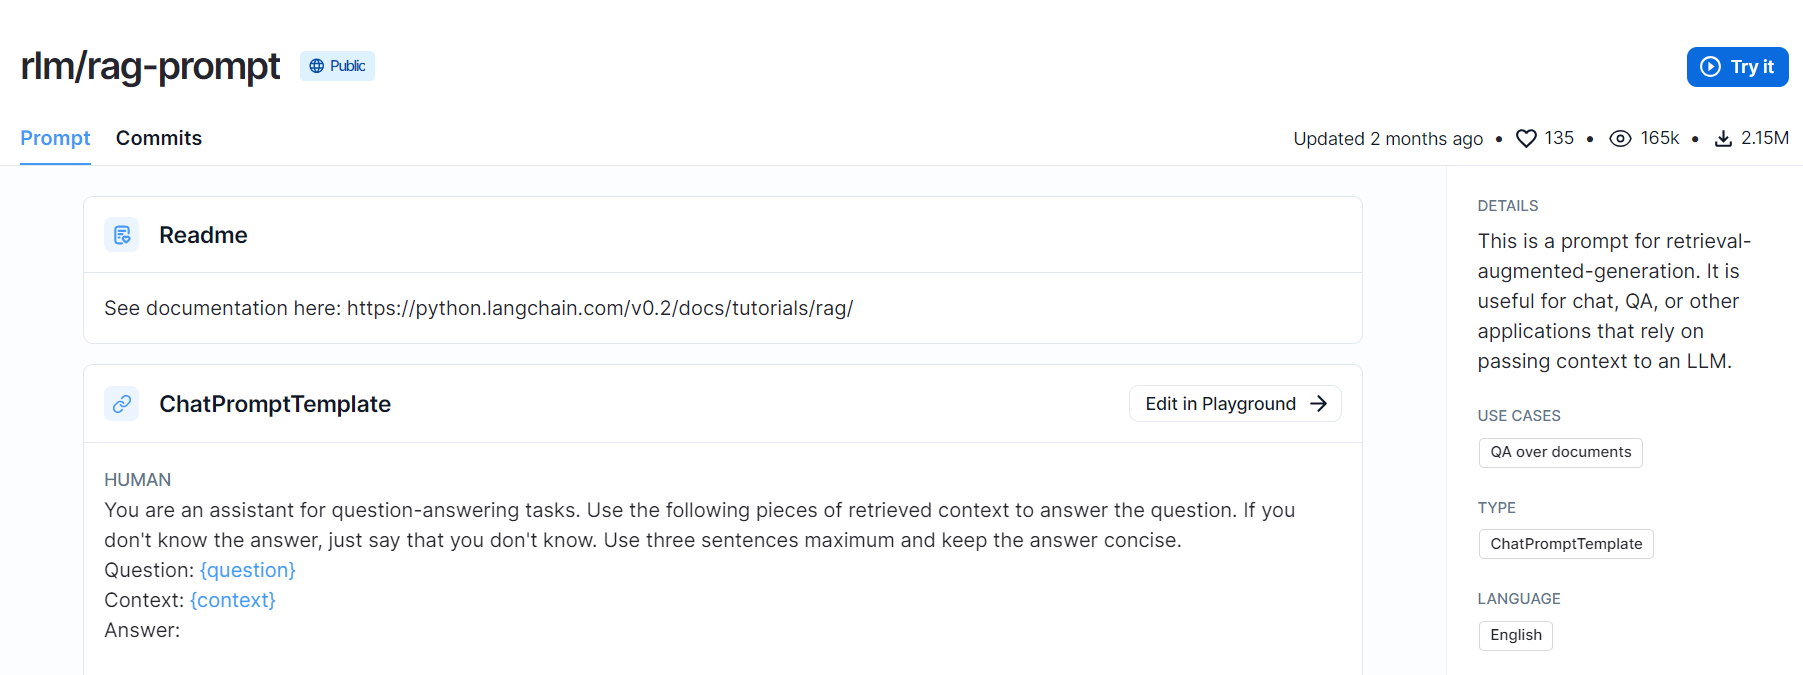

Việc cần làm ở đây là tải các thư viện liên quan tới LangChain (ở đây là langchain, langchainhub, llama-index[langchain], llama-index-llms-langchain và langchain-community).



In [ ]:
!pip install langchain
!pip install langchainhub
from langchain import hub

langchain_prompt = hub.pull("rlm/rag-prompt")

Chúng ta có thể thay đổi prompt template (trong ví dụ này là `text_qa_template`) cho prompt chúng ta tìm được trên LangChain Hub. Lưu ý là phiên bản gốc chỉ có `query_str` và `context_str`, nên để sử dụng prompt đề cập ở trên chúng ta cần map 2 biến này với `question` và `context` trên LangChain Hub.

In [ ]:
from llama_index.core.prompts import LangchainPromptTemplate
!pip install llama_index[langchain]
!pip install -U langchain-community


lc_prompt_tmpl = LangchainPromptTemplate(
    template=langchain_prompt,
    template_var_mappings={"query_str": "question", "context_str": "context"},
)

query_engine.update_prompts(
    {"response_synthesizer:text_qa_template": lc_prompt_tmpl}
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.8 MB/s eta 0:00:00


In [ ]:
!pip install llama-index-llms-langchain


Kết quả của việc chúng ta làm hiện ra khi chúng ta gọi `display_prompt_dict` lần này. Lưu ý ở đây là `refine_template` không đổi ở bước này, do chúng ta không hề thay đổi template đó ở bước trên.

Cùng với đó, `text_qa_template` được chuyển thành JSON, với prompt được coi như metadata. Điều này không ảnh hưởng tới phương pháp và kết quả mà LLM trả về.

In [ ]:
prompts_dict = query_engine.get_prompts()
display_prompt_dict(prompts_dict)

**Prompt Key**: response_synthesizer:text_qa_template<br>**Text:** <br>

input_variables=['context', 'question'] metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"))]


<br><br>

**Prompt Key**: response_synthesizer:refine_template<br>**Text:** <br>

The original query is as follows: {query_str}
We have provided an existing answer: {existing_answer}
We have the opportunity to refine the existing answer (only if needed) with some more context below.
------------
{context_msg}
------------
Given the new context, refine the original answer to better answer the query. If the context isn't useful, return the original answer.
Refined Answer: 


<br><br>

Với template mới, chúng ta có thể đặt câu hỏi cho LLM và nó sẽ trả về câu trả lời như ý muốn. Lưu ý là không phải câu hỏi nào cũng có thể đáp ứng được yêu cầu của prompt template: như với ví dụ này, mặc dù LLM cần trả về tối đa 3 câu, câu trả lời của chúng ta dài hơn (cần 6 câu), bởi Transformers có nhiều bước hơn nhiều và không thể tóm tắt theo 3 câu được.

In [ ]:
response = query_engine.query(query_str)
display_response(response)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:545: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.3` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


**`Final Response:`** The Transformer model architecture is described in the paper "Attention is All You Need" [1]. The model consists of an encoder and a decoder, both of which use stacked self-attention and point-wise, fully connected layers. The encoder has six identical layers, each with two sub-layers: a multi-head self-attention mechanism and a position-wise fully connected feed-forward network. The decoder has an additional sub-layer that performs multi-head attention over the output of the encoder stack. Residual connections and layer normalization are used in both the encoder and decoder. The attention function maps a query and a set of key-value pairs to an output, which is a weighted sum of the values. The Transformer model achieves state-of-the-art results on several natural language processing tasks, including machine translation and constituency parsing.

Source:

* Paper: "Attention is All You Need" [1]

[1] Vaswani, A., Shazeer, N., Parmar, R., Uszkoreit, J., Jones, L., Gomez-Prince, A., ... & Polosukhin, I. (2017). Attention is all you need. In Advances in Neural Information Processing Systems 30 (NIPS 2017) (pp. 3762-3771). arXiv:1706.03762v7.

Chúng ta cần lưu ý, đây chỉ là bước đơn giản nhất để thực hiện prompt engineering cho RAG. Chúng ta có thể hiệu chỉnh prompt hoặc dùng prompt của riêng mình, bằng nhiều cách khác nhau; các phương pháp này đều có thể được sử dụng với LlamaIndex.

Với những phương pháp phức tạp hơn, chúng ta có thể tham khảo trên blog này của LlamaIndex: https://docs.llamaindex.ai/en/stable/examples/prompts/advanced_prompts/